Additional code to generate graphs used in the report.


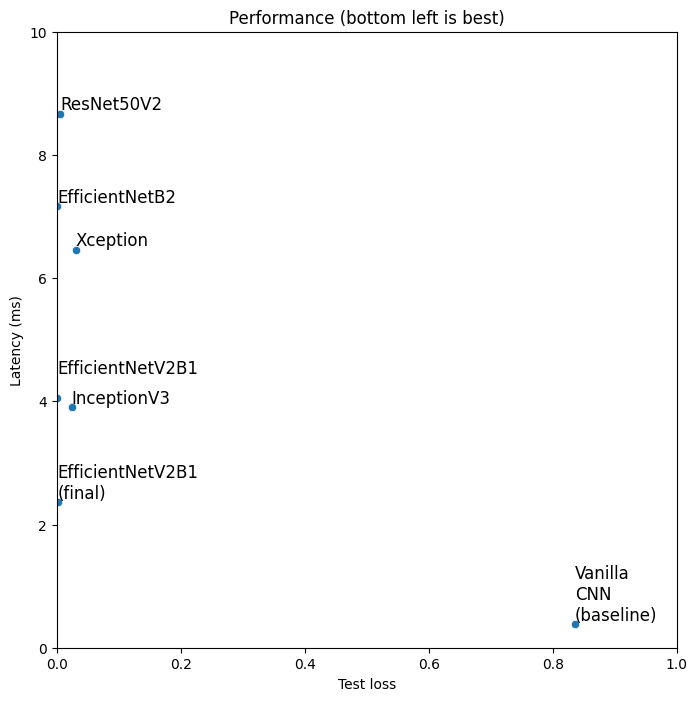

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

labels = [
    "Vanilla\nCNN\n(baseline)",
    "InceptionV3",
    "Xception",
    "EfficientNetB2",
    "EfficientNetV2B1\n",
    "ResNet50V2",
    "EfficientNetV2B1\n(final)",
]
losses = [0.8351, 0.0238, 0.0303, 0.0005, 0.0007, 0.0055, 0.0011]
times = [0.38, 3.90, 6.46, 7.17, 4.05, 8.67, 2.36]

df = pd.DataFrame(
    {
        "Model": labels,
        "Test loss": losses,
        "Latency (ms)": times,
    }
)

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Test loss", y="Latency (ms)")
plt.xlim(0, 1.0)
plt.ylim(0, 10)
plt.title("Performance (bottom left is best)")

for i, label in enumerate(labels):
    plt.text(
        losses[i],
        times[i],
        label,
        ha="left",
        va="bottom",
        fontsize=12,
    )
plt.show()

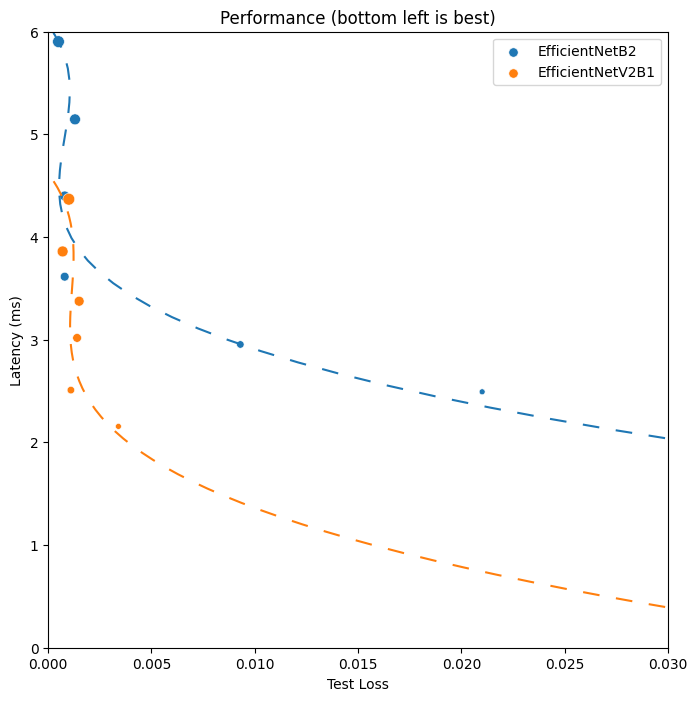

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.DataFrame(
    {
        "Input shape": [192, 224, 256, 288, 320, 352],
        "Test Loss": [0.0210, 0.0093, 0.0008, 0.0008, 0.0013, 0.0005],
        "Latency (ms)": [2.4929, 2.9538, 3.6139, 4.4000, 5.1464, 5.9031],
    }
)
p_l1 = np.polynomial.polynomial.Polynomial.fit(df1["Input shape"], df1["Test Loss"], 3)
p_t1 = np.polynomial.polynomial.Polynomial.fit(df1["Input shape"], df1["Latency (ms)"], 1)

df2 = pd.DataFrame(
    {
        "Input shape": [192, 224, 256, 288, 320, 352],
        "Test Loss": [0.0034, 0.0011, 0.0014, 0.0015, 0.0007, 0.0010],
        "Latency (ms)": [2.1558, 2.5091, 3.0176, 3.3749, 3.8598, 4.3686],
    }
)
p_l2 = np.polynomial.polynomial.Polynomial.fit(df2["Input shape"], df2["Test Loss"], 3)
p_t2 = np.polynomial.polynomial.Polynomial.fit(df2["Input shape"], df2["Latency (ms)"], 1)

# Scatter plot losses against times with different colours for each model and adjust size of points
# based on input size
sns.set_palette("tab10")
plt.figure(figsize=(8, 8))

sns.scatterplot(data=df1, x="Test Loss", y="Latency (ms)", size="Input shape", legend=False)
sns.scatterplot(data=df2, x="Test Loss", y="Latency (ms)", size="Input shape", legend=False)
t = np.linspace(0, 500, 100)
sns.lineplot(x=p_l1(t), y=p_t1(t), sort=False, err_style=None, dashes=[8])
sns.lineplot(x=p_l2(t), y=p_t2(t), sort=False, err_style=None, dashes=[8])

plt.xlabel("Test Loss")
plt.ylabel("Latency (ms)")
plt.xlim(0, 0.03)
plt.ylim(0, 6)
plt.legend(["EfficientNetB2", "EfficientNetV2B1"])
plt.title("Performance (bottom left is best)")
plt.show()